# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** — провести исследовательский анализ данных и выполнить ряд инструкций, которые позволят тщательно изучить объявления о продаже квартир.

**Ход исследования:**

Данные с объявлениями получим из файла `real_estate_data.csv`. Нам понадобится обзор данных перед началом исследования, так как сейчас нет информации об их качестве. Нужно будет поискать возможные ошибки и пропуски в данных, затем устранить их. Также произвести расчеты параметров, которые потребуются в процессе, и внести их в таблицу. По итогу выполним инструкции для изучения объявлений о продаже квартир и сделаем общий вывод. 
 
Таким образом, исследование пройдёт в пять шагов:
 1. Изучение данных из файла.
 2. Предобработка данных.
 3. Расчёты и добавление результатов в таблицу.
 4. Исследовательский анализ данных
 5. Общий вывод.

## 1. Изучение данных из файла

Импортируем библиотеку `pandas` и сохраним ее в сокращенном варианте `pd`. Затем прочитаем файл `real_estate_data.csv` из папки `/datasets`, сохранив его в переменной `ads_apartment`. Дабы все нужные значения не склеились в одной части таблицы, что делает ее непригодной для анализа, сразу добавим разделитель при помощи аргумента `sep`:

In [1]:
import pandas as pd
ads_apartment = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем на экран случайные пятнадцать строк таблицы, чтобы взглянуть на данные впервые и сразу в разных местах. Для этого импортируем библиотеку `random` и вызовем функцию `sample()`. В дополнение, чтобы точно увидеть все столбцы на экране, установим максимальное значение отображаемых столбцов с запасом при помощи функции `set_option()`:

In [2]:
pd.set_option('display.max_columns', 50)

import random
display(ads_apartment.sample(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4503,10,3980000.0,30.9,2018-03-23T00:00:00,1,2.60,9.0,15.30,6,NaN,False,False,8.2,NaN,Санкт-Петербург,12341.0,14933.0,0.0,NaN,1.0,755.0,7.0
12470,13,6900000.0,50.3,2017-11-09T00:00:00,2,NaN,6.0,26.60,4,NaN,False,False,8.1,NaN,Санкт-Петербург,25610.0,4185.0,2.0,293.0,0.0,NaN,39.0
1928,11,125000000.0,224.5,2017-01-24T00:00:00,4,NaN,4.0,163.50,3,False,False,False,30.0,1.0,Санкт-Петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0
23567,0,2849999.0,28.0,2017-05-05T00:00:00,1,NaN,15.0,15.00,5,False,False,False,6.0,0.0,Санкт-Петербург,16708.0,15711.0,1.0,283.0,0.0,NaN,26.0
13392,0,4300000.0,49.8,2017-12-29T00:00:00,2,NaN,9.0,29.00,6,NaN,False,False,7.0,1.0,Санкт-Петербург,30571.0,13724.0,0.0,NaN,0.0,NaN,25.0
21875,11,2500000.0,28.9,2017-06-07T00:00:00,1,2.55,5.0,18.00,3,False,False,False,6.0,0.0,Красное Село,27737.0,31162.0,1.0,403.0,0.0,NaN,15.0
1996,1,6000000.0,86.0,2017-08-05T00:00:00,3,NaN,19.0,50.00,19,NaN,False,False,12.0,2.0,Санкт-Петербург,34279.0,15447.0,0.0,NaN,0.0,NaN,60.0
11199,14,14300000.0,69.5,2018-03-17T00:00:00,2,3.00,6.0,35.80,2,NaN,False,False,14.4,NaN,Санкт-Петербург,22947.0,2488.0,0.0,NaN,0.0,NaN,100.0
23319,9,5000000.0,29.3,2017-12-05T00:00:00,1,2.85,22.0,15.00,5,NaN,False,False,9.0,NaN,Санкт-Петербург,52480.0,15598.0,0.0,NaN,1.0,464.0,74.0
9720,6,6498000.0,39.9,2017-05-03T00:00:00,1,2.70,14.0,15.31,9,NaN,False,False,11.7,1.0,Санкт-Петербург,19553.0,4762.0,0.0,NaN,1.0,533.0,327.0


Теперь познакомимся с данными таблицы при помощи вызова `info()`.  В том числе посмотрим типы данных, количество столбцов и примерно прикинем количество пропущенных значений, дабы оценить масштаб трагедии. Выше мы убедились по случайным строкам таблицы, что пропущенные значения есть:

In [3]:
ads_apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Файл содержит данные по 23 699 объектам недвижимости. Всего в таблице 22 столбца (17 с количественными значениями, 4 с категориальными и 1 с временными). Тип данных соответственно различается. Есть `float`, `int`, `object` и `bool`. Согласно документации к данным:
- `total_images` — число фотографий квартиры в объявлении
- `last_price` — цена на момент снятия с публикации
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `first_day_exposition` — дата публикации
- `rooms` — число комнат
- `ceiling_height` — высота потолков (м)
- `floors_total` — всего этажей в доме
- `living_area` — жилая площадь в квадратных метрах (м²)
- `floor` — этаж
- `is_apartment` — апартаменты
- `studio` — квартира-студия
- `open_plan` — свободная планировка
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `balcony` — число балконов
- `locality_name` — название населённого пункта
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

Видим, что:
- в названиях колонок нет нарушений стиля, поэтому что-либо корректировать в них не будем. Везде соблюден «змеиный_регистр» и название колонок соответствует их описанию в соответствии с документацией;
- В столбцах `last_price`, `floors_total`, `balcony`, `cityCenters_nearest` и `days_exposition` неправильный тип данных и его нужно заменить на `int`, так как нули там лишние и не играют никакой роли, а какие-то значения в принципе не могут быть дробными:
- в столбце `first_day_exposition` нужно будет изменить тип данных и перевести значения в формат без времени, так как оно везде нулевое;
- количество значений в столбцах различается, а это значит, что в данных есть пропущенные значения, что мы и заметили ранее. При этом пропущенных значений довольно таки много. Они есть в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и `days_exposition`;
- в столбце `is_apartment` должен быть тип данных `bool`;
- каких-то аномальных и некорректных значений на первый взгляд нет. 

**Вывод**

В таблице — данные с различными характеристиками квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, которые были выставлены на продажу через сервис Яндекс.Недвижимость. Большинство столбцов посвящены именно характеристикам квартир, некоторые отображают значения самих объявлений на сервисе. 

Предварительно можем утверждать, что данных достаточно для проведения исследовательского анализа данных, однако есть не мало пропусков в данных и столбцы с некорректным типом данных. Предположим, что почти во всех случаях пропуски и некорректный тип данных обусловлен особенностями переноса данных из другой среды, и лишь в некоторых случаях пропусков это связано в принципе с отсутствующими данными. Несмотря на то, что дубликатов при знакомстве с данными не видно, стоит проверить уникальные значения и обработать дубликаты при их наличии. 

Устраним все замеченные недочеты, затем приступим к расчетам и непосредственно к самому исследованию. 

## 2. Предобработка данных

Определим, изучим и обработаем пропущенные значения. Как только убедимся в их отсутствии, приведем тип данных в столбцах к правильному, а также поработаем с дубликатами, чтобы подготовить данные к исследованию. 

### 2.1 Обработка пропусков

Посчитаем сколько всего пропусков во всех столбцах, так как ранее у нас было лишь примерное представление. Выведем информацию с сортировкой по убыванию, чтобы все было наглядно:

In [4]:
ads_apartment.isna().sum().sort_values(ascending = False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

Пропуски содержат более половины столбцов. Изначально удалим строки с пропусками в тех столбцах, где их значения не имеют веса в соотношении с другими, а также в тех, которые не нужны для исследования, затем будем работать с остальными столбцами в порядке очереди.

**1.** В столбцах `floors_total` и `locality_name` удалим пропуски, так как их слишком мало и на результат исследования они не повлияют, а во втором случае мы вообще даже не можем на свое усмотрение устанавливать названия пропущенных населённых пунктов:

In [5]:
ads_apartment = ads_apartment.dropna(subset = ['floors_total', 'locality_name'])

**2.** Данные из столбцов `airports_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` и `ponds_nearest` не понадобятся для исследования, поэтому их можно не трогать, но мы их удалим, чтобы они не мешали при работе с данными. Тем более, что дальше еще нужно будет добавлять другие необходимые столбцы:

In [6]:
ads_apartment = ads_apartment.drop('airports_nearest', 1)
ads_apartment = ads_apartment.drop('parks_around3000', 1)
ads_apartment = ads_apartment.drop('parks_nearest', 1)
ads_apartment = ads_apartment.drop('ponds_around3000', 1)
ads_apartment = ads_apartment.drop('ponds_nearest', 1)

**3.** Пропуски в столбце `balcony` заменим на 0, так как отсутствие данных о числе балконов скорее всего говорит про их отсутствие:

In [7]:
ads_apartment['balcony'] = ads_apartment['balcony'].fillna(0)

**4.** В столбце `ceiling_height` речь идет о высоте потолков и здесь логичнее всего будет заменить пропуски модальным значением, то есть на наиболее распространенный элемент данных в столбце:

In [8]:
ads_apartment['ceiling_height'] = ads_apartment['ceiling_height'].fillna(ads_apartment['ceiling_height'].mode()[0])

**5.** Еще есть большое количество пропусков в столбцах `cityCenters_nearest` и `days_exposition`. В обоих случаях укажем медианные значения:

In [9]:
cityCenters_nearest_median = ads_apartment['cityCenters_nearest'].median()
ads_apartment['cityCenters_nearest'] = ads_apartment['cityCenters_nearest'].fillna(cityCenters_nearest_median)

In [10]:
days_exposition_median = ads_apartment['days_exposition'].median()
ads_apartment['days_exposition'] = ads_apartment['days_exposition'].fillna(days_exposition_median)

**6.** Данные из столбца `is_apartment` не нужны будут для исследования, но пропусков слишком много и можно предположить, что здесь наличие пропусков свидительствует об отрицательном значении, поэтому можно заменить пропуски на `False`:

In [11]:
ads_apartment['is_apartment'] = ads_apartment['is_apartment'].fillna(False)

**7.** В столбце `kitchen_area` значения для студий заменим нулями, так как в студиях кухонь в принципе нет. Оставшиеся пропуски заменим медианным значением по названию локации.

In [12]:
ads_apartment.loc[ads_apartment['studio'] == 1, 'kitchen_area'] = 0
kitchen_median = ads_apartment.groupby('locality_name')['kitchen_area'].median()
for locality_name in kitchen_median.index:
    ads_apartment.loc[(ads_apartment['kitchen_area'].isna()) & (ads_apartment['locality_name'] == locality_name),
                      'kitchen_area'] = kitchen_median.loc[locality_name]

Осталось еще несколько пропусков, которые не относятся к студиям и у которых нет данных по локации, но их слишком мало, поэтому просто удалим эти строки:

In [13]:
ads_apartment = ads_apartment.dropna(subset = ['kitchen_area'])

**8.** Пропуски в `living_area` заполним медианным значением по количеству комнат:

In [14]:
living_median = ads_apartment.groupby('rooms')['living_area'].median()
for rooms in living_median.index:
    ads_apartment.loc[(ads_apartment['rooms'] == rooms),
                      'living_area'] = ads_apartment.loc[(ads_apartment['rooms'] == rooms),
                                                         'living_area'].fillna(living_median[rooms])

Теперь проверим, все ли действия выше привели к ожидаемому результату:

In [15]:
ads_apartment.isna().sum().sort_values(ascending = False)

days_exposition         0
living_area             0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
floor                   0
cityCenters_nearest     0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
total_images            0
dtype: int64

Пропущенных значений больше нет, можно спокойно приступать к следующему этапу. 

**Вывод**

Во многих столбцах оказались пропуски, причем в большом количестве, видимо они образовались в результате каких-то технических проблем в процессе выгрузки данных, а в некоторых случаях из-за того, что пользователи просто не указывали дополнительные параметры квартиры. В итоге мы оставили нетронутыми несколько столбцов, которые не нужны будут для исследования, но с остальными поработали, заменим пропуски на самые подходящие значения. 

О большом количестве пропусков, возможно, стоит сообщить тем, кто выгружал данные, чтобы они перепроверили корректность своей работы. 

### 2.2 Замена типа данных

В столбцах `last_price`, `floors_total`, `balcony`, `cityCenters_nearest` и `days_exposition` неправильный тип данных и его нужно заменить на `int`, так как нули там лишние и не играют никакой роли, а какие-то значения в принципе не могут быть дробными:

In [16]:
for columns in ['last_price', 'floors_total', 'balcony', 'cityCenters_nearest', 'days_exposition']:
    ads_apartment[columns] = ads_apartment[columns].astype('int')

В столбце `first_day_exposition` изменим тип данных на корректный и переведем значения в формат без времени, так как оно везде нулевое:

In [17]:
ads_apartment['first_day_exposition'] = pd.to_datetime(ads_apartment['first_day_exposition'], format = '%Y-%m-%d')

Хоть столбец `is_apartment` и не нужен для исследования, для тренировки заменим тип данных на правильный, так как он должен быть `bool`, ибо значения в столбце имеют логический вид:

In [18]:
ads_apartment['is_apartment'] = ads_apartment['is_apartment'].astype('bool')

Проверим, во всех ли теперь столбцах правильный тип данных:

In [19]:
ads_apartment.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
cityCenters_nearest              int64
days_exposition                  int64
dtype: object

Теперь все четко! 

**Вывод**

При помощи метода `astype` заменили типы данных на корректные, где того требовали обстоятельства. В одном случае потребовалось воспользоваться методом `to_datetime`, чтобы привести дату в читаемый вид. Теперь файл с данными пополнился еще одним типом данных `datetime64`.

### 2.3 Обработка дубликатов

Дубликаты возможны в категориальном столбце `locality_name`, поэтому пробежимся по уникальным значениям этого столбца и на всякий случай выведем их отсортированным списком в свернутом виде, так как значений может быть много:

In [20]:
sorted(ads_apartment['locality_name'].unique().tolist())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Аг

Видно, что есть неявные дубликаты:
- `поселок` и `посёлок`;
- `поселок станции` и `посёлок`;
- `посёлок станции` и `посёлок`;
- `посёлок при железнодорожной станции` и `посёлок`;
- `городской поселок` и `городской посёлок`;
- `коттеджный поселок` и `коттеджный посёлок`;
- `садоводческое некоммерческое товарищество` и `садовое товарищество`.


Уберем неявные дубликаты при помощи метода `replace()`:

In [21]:
ads_apartment['locality_name'] = ads_apartment['locality_name'].str.replace('поселок', 'посёлок', regex=True)
ads_apartment['locality_name'] = ads_apartment['locality_name'].str.replace('посёлок станции', 'посёлок', regex=True)
ads_apartment['locality_name'] = ads_apartment['locality_name'].str.replace('посёлок при железнодорожной станции',
                                                                            'посёлок', regex=True)
ads_apartment['locality_name'] = ads_apartment['locality_name'].str.replace('садоводческое некоммерческое товарищество',
                                                                        'садовое товарищество', regex=True)

In [22]:
sorted(ads_apartment['locality_name'].unique().tolist())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской посёлок Большая Ижора',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Агалатово',
 'деревня Аро',
 'де

На всякий случай еще проверим, есть ли явные дубликаты:

In [23]:
ads_apartment.duplicated().sum()

0

Явных дубликатов нет. Теперь данные выглядят поприятнее и уникальнее, а сам список стал меньше за счет проделанной работы.

**Вывод**

В этом случае причина появления неявных дубликатов ясна - пользователи сами заполняли названия населённого пункта в объявлении, а так как сервис не предлагает фиксированные значения из выпадающего списка по собственной базе и позволяет пользователю вбивать любое, появились неявные дубликаты. Было бы полезно передать ответственным информацию на доработку, чтобы при заполнении названия пользователю предлагался вариант из собственной базы.

**Общий вывод:**

Как и планировали, определили пропущенные значения, затем изучили их и обработали. Их было довольно таки много, но теперь нет вовсе. Привели тип данных в столбцах к правильному, а также выявили неявные дубликаты и убрали их. 

## 3. Расчёты и добавление результатов в таблицу

Займемся не менее важным шагом, без которого наше исследование было бы не полным. Посчитаем и добавим в таблицу следующие значения:

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры по категориям: первый, последний и другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

**1.** Добавим столбец `square_price` в таблицу, в котором будет цена за квадратный метр. Получим ее поделив `last_price` на `total_area`:

In [24]:
ads_apartment['square_price'] = ads_apartment['last_price'] / ads_apartment['total_area']

**2.** Теперь добавим столбцы с днем недели, месяцем и годом публикации объявления при помощи специальных методов:

In [25]:
ads_apartment['weekday_exposition'] = ads_apartment['first_day_exposition'].dt.weekday
ads_apartment['month_exposition'] = ads_apartment['first_day_exposition'].dt.month
ads_apartment['year_exposition'] = ads_apartment['first_day_exposition'].dt.year

**3.** Не менее важным будет добавить столбец `floor_category`с категориальными значениями по этажам:

In [26]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый этаж'
    elif row['floor'] == row['floors_total']:
        return 'последний этаж'
    return 'другой этаж'

ads_apartment['floor_category'] = ads_apartment.apply(floor_category, axis=1)

**4.** Произведем расчет соотношения жилой к общей площади, а также соотношение площади кухни к общей площади. Конечно, создадим столбцы `living_area_ratio` и `kitchen_area_ratio` под эти значения:

In [27]:
ads_apartment['living_area_ratio'] = ads_apartment['living_area'] / ads_apartment['total_area']
ads_apartment['kitchen_area_ratio'] = ads_apartment['kitchen_area'] / ads_apartment['total_area']

Обновим порядок столбцов в таблице, чтобы они были на более удобных местах с учетом добавления новых в результате работы на этом шаге и заодно убедимся, что порядок изменился:

In [28]:
ads_apartment = ads_apartment[['total_images', 'last_price', 'total_area',
               'square_price', 'first_day_exposition', 'rooms',
               'ceiling_height', 'floors_total', 'floor', 'floor_category',
               'living_area', 'living_area_ratio', 'kitchen_area', 'kitchen_area_ratio',
               'is_apartment','studio', 'open_plan', 'balcony', 'locality_name', 'cityCenters_nearest',
               'days_exposition', 'weekday_exposition', 'month_exposition', 'year_exposition']]

ads_apartment.head(1)

,total_images,last_price,total_area,square_price,first_day_exposition,rooms,ceiling_height,floors_total,floor,floor_category,living_area,living_area_ratio,kitchen_area,kitchen_area_ratio,is_apartment,studio,open_plan,balcony,locality_name,cityCenters_nearest,days_exposition,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,120370.37037,2019-03-07,3,2.7,16,8,другой этаж,51.0,0.472222,25.0,0.231481,False,False,False,0,Санкт-Петербург,16028,95,3,3,2019


На всякий случай проверим, чтобы везде был правильный тип данных после добавления новых столбцов:

In [29]:
ads_apartment.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
square_price                   float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
floor                            int64
floor_category                  object
living_area                    float64
living_area_ratio              float64
kitchen_area                   float64
kitchen_area_ratio             float64
is_apartment                      bool
studio                            bool
open_plan                         bool
balcony                          int64
locality_name                   object
cityCenters_nearest              int64
days_exposition                  int64
weekday_exposition               int64
month_exposition                 int64
year_exposition                  int64
dtype: object

Все в порядке, типы данных соответствуют значениям в столбцах. 

**Вывод.**

Мы добавили ряд новых столбцов со значениями, которые помогут нам при исследовательском анализе данных. Пришерстили их к удобному расположению в таблице, а также убедились в правильности действий, в том числе перепроверив типы данных в столбцах, чтобы не столкнуться с возможными проблемами в дальнейшем. 

## 4. Исследовательский анализ данных

Начнем самую объемную часть, после того как провели предобработку данных и добавили необходимые расчеты. В исследовательский анализ включим следующие шаги:

- изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра;
- изучим время продажи квартиры. Построем гистограмму, а также посчитаем среднее и медиану. Ответим на вопрос о том, сколько обычно дней занимает продажа;
- уберем редкие и выбивающиеся значения, посмотрим на их особенности;
- выясним, какие факторы больше всего влияют на стоимость квартиры, а также определим зависимость цены от ряда факторов;
- выделим 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населённых пунктах, посмотрим на самую высокую и самую низкую стоимость жилья;
- изучим предложения квартир именно в Санкт-Петербурге, чтобы выяснить, какая именно область считается центром города;
- изучим ряд параметров по сегменту квартир в центре Санкт-Петербурга и сравним их с общими выводами по всему городу.

### 4.1 Исследование площади, цены, числа комнат и высоты потолков

**1.** Для начала импортируем библиотеку `matplotlib`, так как нам понадобятся ее возможности. Построим первую гистограмму для столбца `total_area`. Будем делать их пошире и с большим количеством корзин в зависимости от параметра, чтобы было нагляднее:

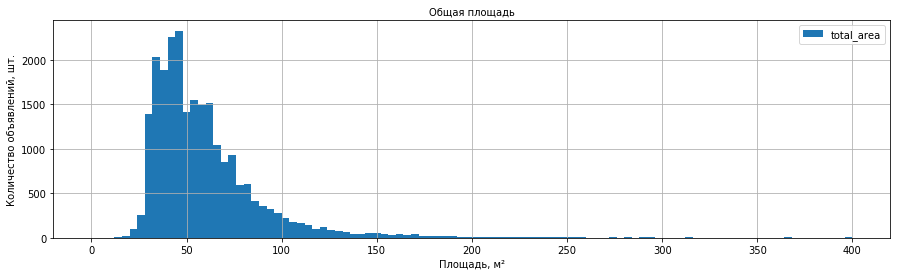

In [30]:
import matplotlib.pyplot as plt

ads_apartment.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,400))
plt.title('Общая площадь', size=10)
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений, шт.')
plt.show()

И методом `describe` получим основные характеристики данных в столбце. В следующих трех параметрах будем делать также:

In [31]:
ads_apartment['total_area'].describe()

count    23547.000000
mean        60.323866
std         35.650209
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Данные выглядят адекватно, так как нет нулевых значений в площадях квартир. Среднее значение составляет 60 м², при этом у квартир с площадью примерно 45 м² наибольшее количество предложений на сервисе, свыше 2 000, если сравнивать с другими. Есть еще максимальное в 900 м², которое сильно выбивается, но не влияет на общую картину. Это либо соединенная элитная квартира из нескольких этажей, либо ошибка в данных.

**2.** Построим гистограмму по столбцу `last_price`, чтобы изучить стоимость квартир:

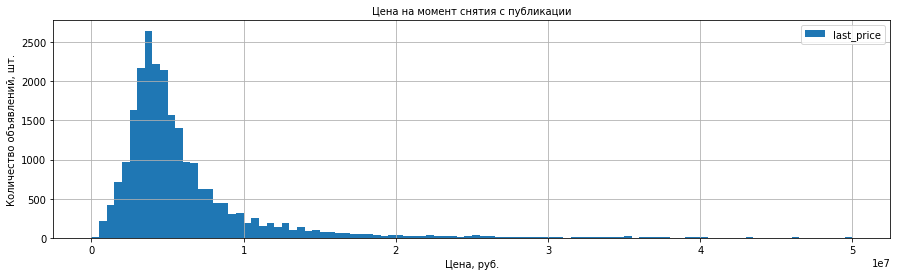

In [32]:
ads_apartment.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,50000000))
plt.title('Цена на момент снятия с публикации', size=10)
plt.xlabel('Цена, руб.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

In [33]:
ads_apartment['last_price'].describe()

count    2.354700e+04
mean     6.543206e+06
std      1.091432e+07
min      1.219000e+04
25%      3.410500e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Если смотреть на гистограмму, то в целом все в порядке Есть выбивающиеся значения, но их меньшинство. например, квартира стоимостью 12 190 рублей, что нереально. При том, что действительно бывают очень дорогующие шикарные квартиры и в эту сторону это работает немного по другому. Среднее значение стоимости квартир 6 543 206 рублей, что выглядит здраво. Единственное, данные мы видим в экспоненциальной записи чисел.

**3.** Теперь построим гистограмму для столбца `rooms` и взглянем на результат:

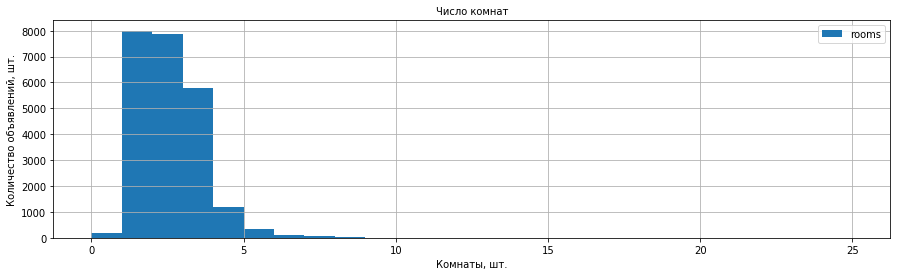

In [34]:
ads_apartment.plot(y = 'rooms', kind = 'hist', bins = 25, grid=True, figsize = (15,4), range = (0,25))
plt.title('Число комнат', size=10)
plt.xlabel('Комнаты, шт.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

In [35]:
ads_apartment['rooms'].describe()

count    23547.000000
mean         2.070710
std          1.078568
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Как мы узнали из предыдущих гистаграмм, возможно есть элитные квартиры, либо ошибка в данных, поэтому 8 комнат вполне возможно, но 19 комнат выглядит странно, это уже выбивающееся значение. При этом еще есть несколько объявлений, в которых 0 комнат, это не нормально. Возможно, что ошиблись при публикации объявлений. Среднее количество комнат - 2 из общего числа объявлений, здесь все в порядке. 

**4.** И в заключении посмотрим на гистограмму столбца `ceiling_height`:

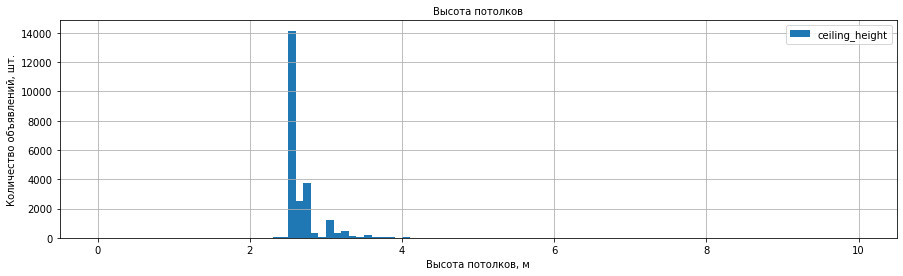

In [36]:
ads_apartment.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,10))
plt.title('Высота потолков', size=10)
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений, шт.')
plt.show()

In [37]:
ads_apartment['ceiling_height'].describe()

count    23547.000000
mean         2.666809
std          0.998408
min          1.000000
25%          2.500000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Здесь тоже в целом все в порядке. Средняя высота потолка - 2,5 метра, но есть и странные значения, которые не влияют сильно на данные. Высота потолка 1 метр и 100 метров - здесь явно что-то не так, это не просто выбивающиеся значения, а скорее нереальное положение дел для квартир. 

**Вывод.**

По итогу, данные в нормальном состоянии, на их основе можно делать какие-то выводы, но есть небольшие выбивающиеся значения абсолютно в каждом изученном столбце, с которыми все-таки стоит поработать и при необходимости их удалить. 

### 4.2 Исследование количества времени для продажи квартиры

Изучим время продажи квартир. Для начала выявим среднее и медиану:

In [38]:
print('Среднее значение с момента публикации объявления до снятия:', ads_apartment['days_exposition'].mean())
print('Медианное значение с момента публикации объявления до снятия:', ads_apartment['days_exposition'].median())

Среднее значение с момента публикации объявления до снятия: 169.21620588610014
Медианное значение с момента публикации объявления до снятия: 95.0


Построим гистограмму:

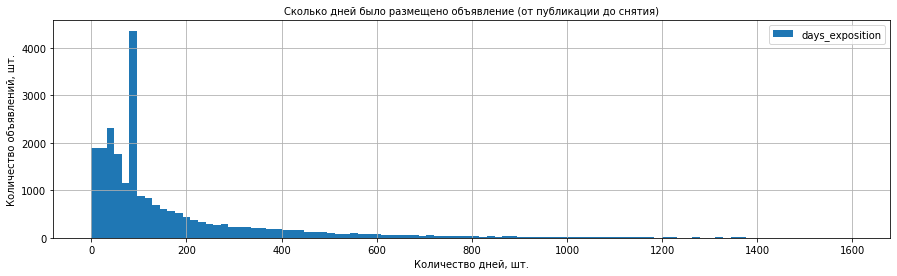

In [39]:
ads_apartment.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,1600))
plt.title('Сколько дней было размещено объявление (от публикации до снятия)', size=10)
plt.xlabel('Количество дней, шт.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

In [40]:
ads_apartment['days_exposition'].describe()

count    23547.000000
mean       169.216206
std        206.464843
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Есть большой пик в районе 90 дней и поменьше в районе 45 дней, после 600 дней объявлений все меньше и меньше с таким длительным показателем продажи.

**Вывод.**

Если судить по состоянию данных на текущий момент, то в среднем объявление снимают с публикации через 169 дней, но более справедливо медианное значение в 95 дней, так как среднее значение портят выбросы. Большинство объявлений снимают с публикации за 45 и 90 дней, что является очень хорошим показателем, а необычно долгие висят больше 2 лет. При этом мы не можем утверждать, что эти быстрые снятия объявлений это именно продажи, так как мог закончиться срок публикации, а также владелец объявления мог снять его по своим личным причинам. 

### 4.3 Анализ редких и выбивающихся значений по исследованным параметрам

Построим диаграммы размаха и вычислим примерные границы выбросов. Проанализиуем редкие и выбивающиеся значения по пяти ранее изученным параметрам в порядке очередности, а затем избавимся от них, «причесав усы». 

**1.** Выведем диаграмму размаха и представление по выборке столбца `total_area`:

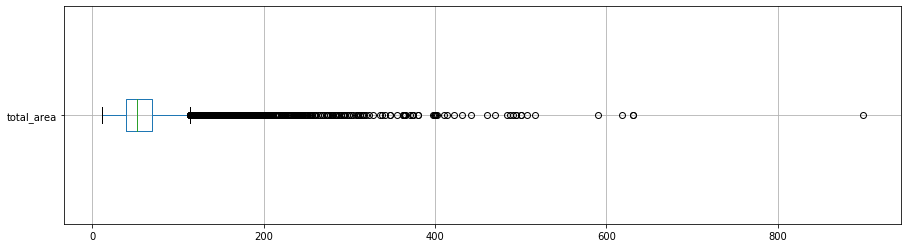

count    23547.000000
mean        60.323866
std         35.650209
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [41]:
ads_apartment.boxplot('total_area', vert = False, figsize = (15,4))
plt.show()

ads_apartment['total_area'].describe()

Посчитаем «межквартильный размах», то есть IQR и определим границы интервала наиболее вероятных выбросов:

In [42]:
q1 = ads_apartment['total_area'].quantile(0.25) #первый квартиль
q3 = ads_apartment['total_area'].quantile(0.75) #третий квартиль
iqr = q3 - q1 # iqr
l1 = q1 - 1.5 * iqr #нижняя граница выбросов
l2 = q3 + 1.5 * iqr #верхняя граница выбросов

print(f'IQR равен {int(iqr)}. Нижняя граница выбросов равна {int(l1)}, а верхняя {int(l2)}.')

IQR равен 29. Нижняя граница выбросов равна -4, а верхняя 114.


Учтем, что нельзя удалять все, что диаграмма принимает за выбросы. В связи с этим, будем ориентироваться в основном на здравый смысл и общепринятые значения. 

Теперь удалим значения, которые вышли «усы» с учетом нашего плана. Вряд ли есть квартиры с площадью в 5 м², поэтому здесь следуем нижней границе, а вот квартиры с большой площадью очень даже бывают, поэтому верхнюю границу увеличим вдвое:

In [43]:
ads_apartment.drop(ads_apartment[ads_apartment['total_area'] > 184].index, inplace=True)
ads_apartment.drop(ads_apartment[ads_apartment['total_area'] < 5].index, inplace=True)

И сразу же убедимся в том, что удалили редкие и выбивающиеся значения по нашей задумке: 

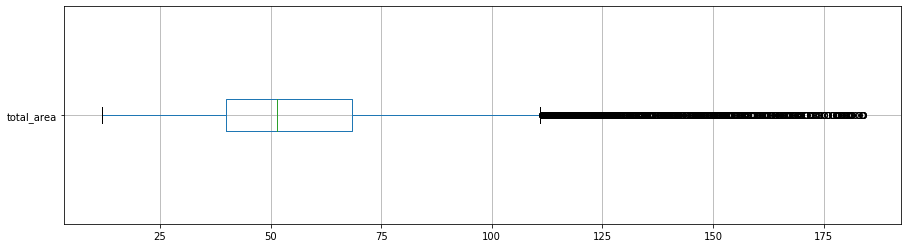

count    23256.000000
mean        57.779841
std         25.587066
min         12.000000
25%         40.000000
50%         51.500000
75%         68.400000
max        184.000000
Name: total_area, dtype: float64

In [44]:
ads_apartment.boxplot('total_area', vert = False, figsize = (15,4))
plt.show()

ads_apartment['total_area'].describe()

**2.** Теперь повторим по столбцу `last_price`:

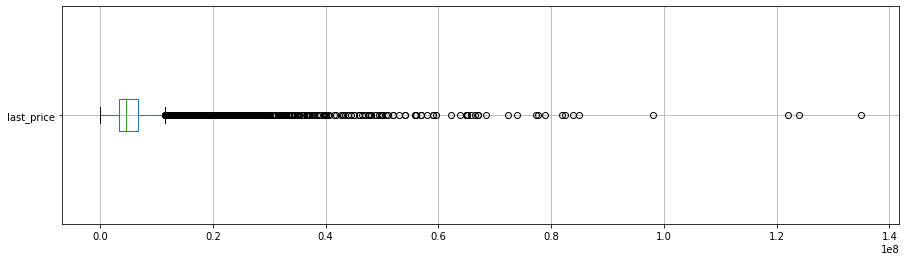

count    2.325600e+04
mean     5.933975e+06
std      5.326134e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      1.350000e+08
Name: last_price, dtype: float64

In [45]:
ads_apartment.boxplot('last_price', vert = False, figsize = (15,4))
plt.show()

ads_apartment['last_price'].describe()

Посчитаем IQR и определим границы интервала наиболее вероятных выбросов:

In [46]:
q1 = ads_apartment['last_price'].quantile(0.25) #первый квартиль
q3 = ads_apartment['last_price'].quantile(0.75) #третий квартиль
iqr = q3 - q1 # iqr
l1 = q1 - 1.5 * iqr #нижняя граница выбросов
l2 = q3 + 1.5 * iqr #верхняя граница выбросов

print(f'IQR равен {int(iqr)}. Нижняя граница выбросов равна {int(l1)}, а верхняя {int(l2)}.')

IQR равен 3250000. Нижняя граница выбросов равна -1475000, а верхняя 11525000.


Есть минусовые значения, что не нормально для цены, а также вряд ли квартира будет стоить меньше 500 000 рублей, поэтому нижнюю границу установим на этом уровне, а вот стоимость недвижимости совсем не ограничена, поэтому цифры могут быть «будьте здрасьте», особенно в центре города. Верхней границы нам явно будет мало, поэтому увеличим ее в пять раз, дабы не потерять важные данные:

In [47]:
ads_apartment.drop(ads_apartment[ads_apartment['last_price'] > 57625000].index, inplace=True)
ads_apartment.drop(ads_apartment[ads_apartment['last_price'] < 500000].index, inplace=True)

Проверяем:

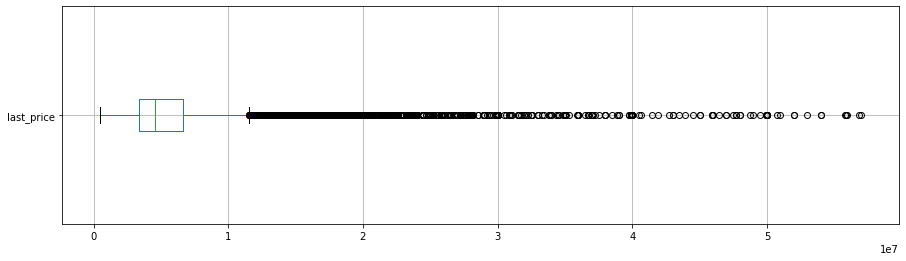

count    2.321400e+04
mean     5.849095e+06
std      4.660471e+06
min      5.000000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      5.700000e+07
Name: last_price, dtype: float64

In [48]:
ads_apartment.boxplot('last_price', vert = False, figsize = (15,4))
plt.show()

ads_apartment['last_price'].describe()

**3.** На очереди столбец `rooms`:

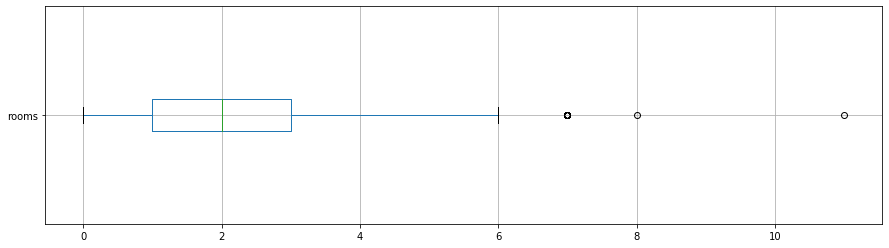

count    23214.000000
mean         2.025674
std          0.982084
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [49]:
ads_apartment.boxplot('rooms', vert = False, figsize = (15,4))
plt.show()

ads_apartment['rooms'].describe()

Посчитаем IQR и определим границы интервала наиболее вероятных выбросов:

In [50]:
q1 = ads_apartment['rooms'].quantile(0.25) #первый квартиль
q3 = ads_apartment['rooms'].quantile(0.75) #третий квартиль
iqr = q3 - q1 # iqr
l1 = q1 - 1.5 * iqr #нижняя граница выбросов
l2 = q3 + 1.5 * iqr #верхняя граница выбросов

print(f'IQR равен {int(iqr)}. Нижняя граница выбросов равна {int(l1)}, а верхняя {int(l2)}.')

IQR равен 2. Нижняя граница выбросов равна -2, а верхняя 6.


Одна комната может быть, это нормально. 11 комнат - это уже что-то на грани фантастики, хотя исключать нельзя, но все-таки свыше 6-ти комнат это выбивающиеся и редкие значения, если верить портал ЦИАН'у, в котором максимальное значение - 6 комнат, где квартиры стоят зачастую больше 50-ти миллионов рублей. Здесь мы идеально впишемся в «усы»:

In [51]:
ads_apartment.drop(ads_apartment[ads_apartment['rooms'] > 6 ].index, inplace=True)
ads_apartment.drop(ads_apartment[ads_apartment['rooms'] < 1 ].index, inplace=True)

Проверяем:

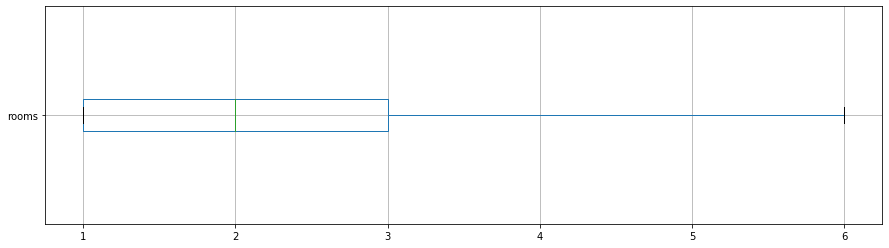

count    23005.000000
mean         2.038687
std          0.957939
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [52]:
ads_apartment.boxplot('rooms', vert = False, figsize = (15,4))
plt.show()

ads_apartment['rooms'].describe()

**4.** А вот и `ceiling_height`:

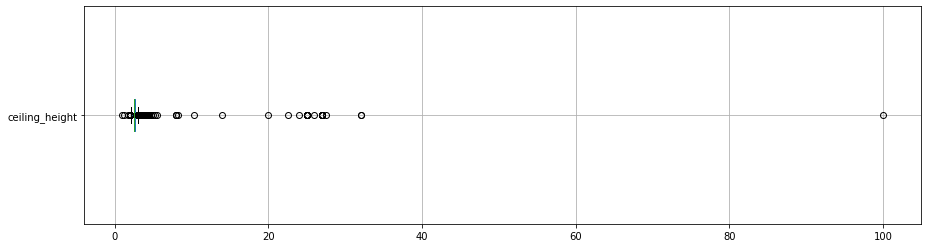

count    23005.000000
mean         2.660566
std          0.993339
min          1.000000
25%          2.500000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [53]:
ads_apartment.boxplot('ceiling_height', vert = False, figsize = (15,4))
plt.show()

ads_apartment['ceiling_height'].describe()

Посчитаем IQR и определим границы интервала наиболее вероятных выбросов:

In [54]:
q1 = ads_apartment['ceiling_height'].quantile(0.25) #первый квартиль
q3 = ads_apartment['ceiling_height'].quantile(0.75) #третий квартиль
iqr = q3 - q1 # iqr
l1 = q1 - 1.5 * iqr #нижняя граница выбросов
l2 = q3 + 1.5 * iqr #верхняя граница выбросов

print(f'IQR равен {int(iqr)}. Нижняя граница выбросов равна {int(l1)}, а верхняя {int(l2)}.')

IQR равен 0. Нижняя граница выбросов равна 2, а верхняя 3.


Если верить открытым источникам, то минимальная высота потолка в России составляет 2.4 м, ниже сейчас вряд ли найти, поэтому здесь выбросы однозначны. Высота потолков выше 4 метров бывает в люксовой недвижимости, но не сильно выше, поэтому к верхней границе прибавим 1.5:

In [55]:
ads_apartment.drop(ads_apartment[ads_apartment['ceiling_height'] > 4.5].index, inplace=True)
ads_apartment.drop(ads_apartment[ads_apartment['ceiling_height'] < 2.4].index, inplace=True)

Проверка:

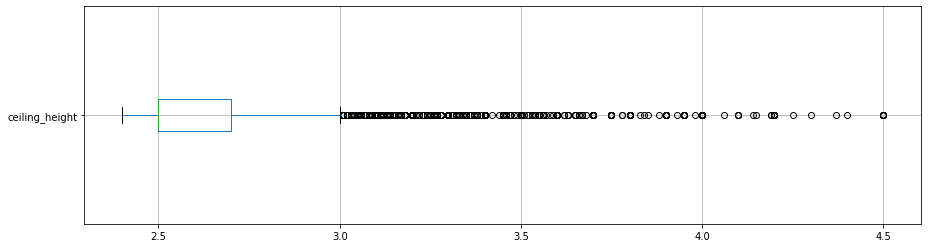

count    22951.000000
mean         2.633191
std          0.227157
min          2.400000
25%          2.500000
50%          2.500000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

In [56]:
ads_apartment.boxplot('ceiling_height', vert = False, figsize = (15,4))
plt.show()

ads_apartment['ceiling_height'].describe()

**5.** В заключение `days_exposition`:

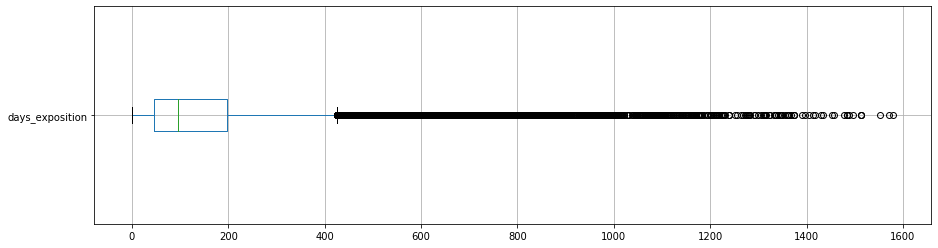

count    22951.000000
mean       168.533092
std        205.233636
min          1.000000
25%         45.000000
50%         95.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [57]:
ads_apartment.boxplot('days_exposition', vert = False, figsize = (15,4))
plt.show()

ads_apartment['days_exposition'].describe()

Посчитаем IQR и определим границы интервала наиболее вероятных выбросов:

In [58]:
q1 = ads_apartment['days_exposition'].quantile(0.25) #первый квартиль
q3 = ads_apartment['days_exposition'].quantile(0.75) #третий квартиль
iqr = q3 - q1 # iqr
l1 = q1 - 1.5 * iqr #нижняя граница выбросов
l2 = q3 + 1.5 * iqr #верхняя граница выбросов

print(f'IQR равен {int(iqr)}. Нижняя граница выбросов равна {int(l1)}, а верхняя {int(l2)}.')

IQR равен 152. Нижняя граница выбросов равна -183, а верхняя 425.


В данных есть отрицательные значения, с ними не поработать, поэтому будем убирать, в остальном скорость продажи может быть хоть день в день, если так удачно покупатель наткнется на квартиру мечты. Из открытых источников узнали, что средний срок продажи однокомнатных квартир составляет 1–2 месяца, двухкомнатных — 2–4 месяца, а трехкомнатных — до 6 месяцев. У нас в данных есть квартиры с большим количеством комнат, которые могут продаваться дольше, но все зависит от ряда факторов, в том числе от степени везения и адекватности выставленной цены, иногда срок продажи может заметно затянуться. Укажем в качестве максимального значения 730 дней, то есть 2 года, так как в данных очень много значений, которые даже этот срок превышают:

In [59]:
ads_apartment.drop(ads_apartment[ads_apartment['days_exposition'] > 730].index, inplace=True)
ads_apartment.drop(ads_apartment[ads_apartment['days_exposition'] < 0].index, inplace=True)

Проверка:

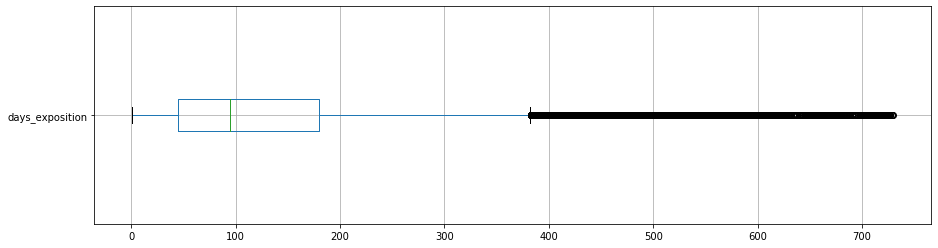

count    22236.000000
mean       142.904839
std        145.979512
min          1.000000
25%         45.000000
50%         95.000000
75%        180.000000
max        730.000000
Name: days_exposition, dtype: float64

In [60]:
ads_apartment.boxplot('days_exposition', vert = False, figsize = (15,4))
plt.show()

ads_apartment['days_exposition'].describe()

**Вывод.**

По каждому изученному ранее столбцу нашли редкие и выбивающиеся значения, изучили их и удалили. Обнаружили такую особенность, что подобных значений оказалось довольно таки не мало в каждом случае, поэтому пришлось тщательно их изучить перед удалением, чтобы удалить слишком много и в итоге это в лучшую сторону повлияло на дальнейшее исследование. Во всех случаях не стали убирать абсолютно все выбивающиеся значения за пределами «усов», так как они хоть и выбивались, но выглядят реальными и необходимыми для дальнейшего исследования. В качестве аргументов вычисляли границы выбросов, а также приводили факты из открытых источников. 

### 4.4 Исследование факторов, влияющих на стоимость квартиры

Выясним, какие факторы больше всего влияют на стоимость квартиры. Для этого изучим зависимость цены от площади, числа комнат и удалённости от центра, а также зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Дополнительно изучим зависимость цены от даты размещения объявления: дня недели, месяца и года. 

**1.** Зависимость цены от площади квартиры:

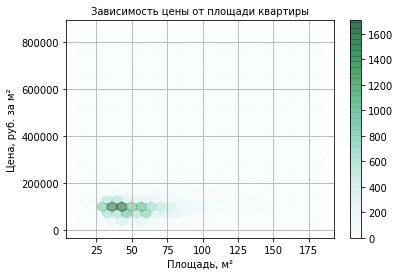

In [61]:
ads_apartment.plot(x = 'total_area', y = 'square_price', kind = 'hexbin', alpha = 0.5, sharex=False, grid=True, gridsize = 25)
plt.title('Зависимость цены от площади квартиры', size = 10)
plt.xlabel('Площадь, м²')
plt.ylabel('Цена, руб. за м²')
plt.show()

In [62]:
print('Коэффициент корреляции =', ads_apartment['last_price'].corr(ads_apartment['total_area']).round(2))

Коэффициент корреляции = 0.75


**2.** Зависимость цены от числа комнат:

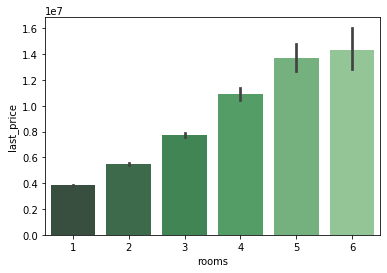

In [63]:
import seaborn as sb
sb.barplot(x = "rooms", y = "last_price", data = ads_apartment, palette="Greens_d")
plt.show()

**3.** Зависимость цены от удалённости от центра:

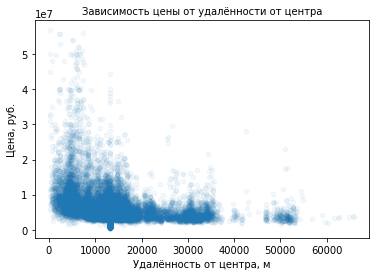

In [65]:
ads_apartment.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', alpha = 0.05)
plt.title('Зависимость цены от удалённости от центра', size = 10)
plt.xlabel('Удалённость от центра, м')
plt.ylabel('Цена, руб.')
plt.show()

In [66]:
print('Коэффициент корреляции =', ads_apartment['last_price'].corr(ads_apartment['cityCenters_nearest']).round(2))

Коэффициент корреляции = -0.28


**4.** Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом:

In [67]:
floor_table = ads_apartment.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'count')

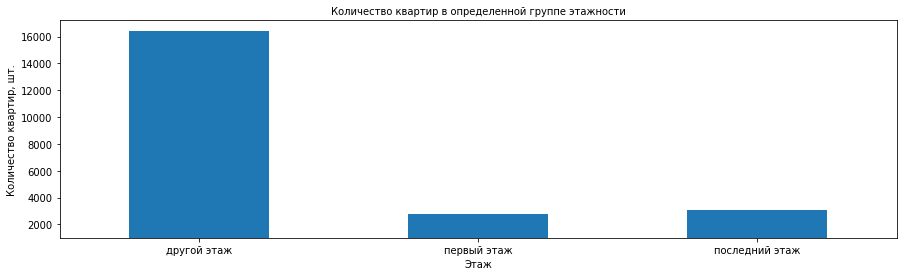

In [68]:
floor_table.plot(kind = 'bar', figsize = (15, 4), rot = 360).legend_.remove()
plt.ylim(bottom = 1000)
plt.xlabel('Этаж')
plt.title('Количество квартир в определенной группе этажности', size = 10)
plt.ylabel('Количество квартир, шт.')
plt.show()

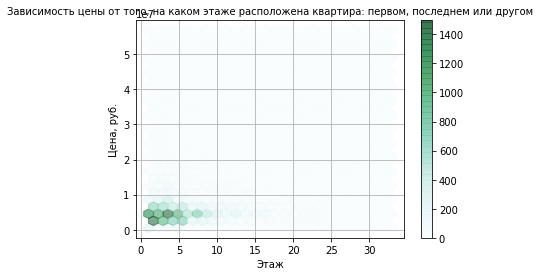

In [69]:
ads_apartment.plot(x = 'floor', y = 'last_price', kind = 'hexbin', alpha = 0.5, sharex=False, grid=True, gridsize = 25)
plt.title('Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом', size = 10)
plt.xlabel('Этаж')
plt.ylabel('Цена, руб.')
plt.show()

**5.** Зависимость цены от даты размещения объявления: дня недели, месяца и года:

In [71]:
pivot_table_weekday_exposition = ads_apartment.pivot_table(index = 'weekday_exposition',
                                                           values = 'square_price', aggfunc = ['mean', 'count'])
pivot_table_weekday_exposition.columns = ['mean', 'count']
pivot_table_weekday_exposition.sort_values('mean', ascending = False)

,mean,count
weekday_exposition,,
0,98085.001687,3413
3,97928.614682,4011
1,97810.916913,3922
2,97803.203263,3697
4,96973.617211,3775
6,96091.273256,1593
5,95883.093916,1825


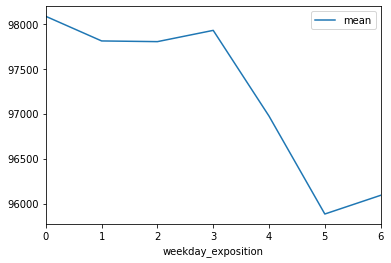

In [72]:
pivot_table_weekday_exposition.plot(y = 'mean')
plt.show()

Видим, что в понедельник и среду средняя стоимость квартир в объявлениях выше, чем в другие дни, а в субботу ниже остальных дней. 

In [73]:
pivot_table_month_exposition = ads_apartment.pivot_table(index = 'month_exposition',
                                                           values = 'square_price', aggfunc = ['mean', 'count'])
pivot_table_month_exposition.columns = ['mean', 'count']
pivot_table_month_exposition.sort_values('mean', ascending = False)

,mean,count
month_exposition,,
4,99413.581530,2255
8,98721.263070,1660
1,98211.760474,1399
9,98018.269239,1852
2,97560.383406,2508
3,97551.791869,2403
11,97472.444683,2234
7,96812.901346,1576
5,96455.926674,1186


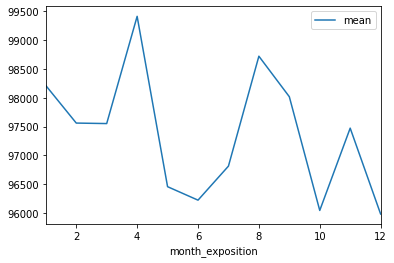

In [74]:
pivot_table_month_exposition.plot(y = 'mean')
plt.show()

В марте и апреле средняя стоимость квартир в объявлениях наивысшая, а в июне наоборот самая низкая.

In [75]:
pivot_table_year_exposition = ads_apartment.pivot_table(index = 'year_exposition',
                                                           values = 'square_price', aggfunc = ['mean', 'count'])
pivot_table_year_exposition.columns = ['mean', 'count']
pivot_table_year_exposition.sort_values('mean', ascending = False)

,mean,count
year_exposition,,
2014,117973.326285,60
2019,105645.317728,2806
2015,99466.144270,743
2018,96976.611490,8296
2017,95342.057368,7891
2016,95327.640404,2440


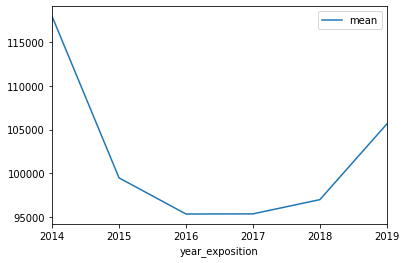

In [76]:
pivot_table_year_exposition.plot(y = 'mean')
plt.show()

В 2014 году цена была самой высокой, а в 2015 году было резкое падение цен, дальше идет медленный рост из года в год. 

**Вывод.**

Как итог:

- имеется средне-положительная линейная зависимость цены квартиры от общей площади, основной массив данных наблюдается в диапазонах от 25 м² до 50 м² и стоимости от 80 тыс. руб. до 120 тыс. руб. за м² соответственно;
- по графику видно, что с увеличением числа комнат увеличивается и цена, поэтому зависимость определенно есть. Единственное, начиная с пяти комнат, рост цены не сильный;
- видим слабо-отрицательную зависимость цены квартиры от удалённости от центра, когда при удалении от центра происходит снижение цены;
- видим, что бОльшую часть объявлений занимают квартиры не на первом и не на последнем этажах, а на других, при этом зависимость цены квартиры от этажа не прослеживается;
- есть некоторая зависимость цены от даты размещения объявления. Во-первых, заметно, что именно в зимнее время года цены в размещаемых объявлениях наиболее низкие. Во-вторых, резкое падение цен в 2015-2016 годах скорее всего связано с валютным кризисом в России. Если говорить о днях недели, то тут скорее фактор активности самих людей.

### 4.5 Анализ десяти населённых пунктов с наибольшим числом объявлений

Выделим 10 населённых пунктов с наибольшим числом объявлений, собрав их в отдельную таблицу. И сразу же посчитаем среднюю цену квадратного метра в этих населённых пунктах для сравнения:

In [77]:
top10_locality = (ads_apartment.groupby('locality_name')
                ['square_price'].agg(['mean', 'count'])).sort_values(by = 'count', ascending = False).head(10)
top10_locality

,mean,count
locality_name,,
Санкт-Петербург,112131.936003,14711
посёлок Мурино,85148.662590,508
посёлок Шушары,78241.453167,424
Всеволожск,68805.583868,379
Пушкин,102952.083151,350
Колпино,75262.861444,331
посёлок Парголово,90295.905695,315
Гатчина,68866.795319,292
деревня Кудрово,92394.136106,265


Теперь создадим переменную не только по 10 населённым пунктам, затем выделим населённые пункты с самой высокой и самой низкой стоимостью жилья:

In [78]:
top_locality = (ads_apartment.groupby('locality_name')
                ['square_price'].agg(['mean', 'count'])).sort_values(by = 'count', ascending = False)

In [79]:
print(top_locality.sort_values(by = 'mean', ascending = False).head(10))

                            mean  count
locality_name                          
Зеленогорск        115122.799198     24
посёлок Лисий Нос  113728.348730      2
Санкт-Петербург    112131.936003  14711
посёлок Репино     104238.614786      4
Пушкин             102952.083151    350
Сестрорецк         102541.069000    175
Кудрово             99880.877074    164
деревня Мистолово   98549.976709     11
Мурино              92479.984920     33
деревня Кудрово     92394.136106    265


In [80]:
print(top_locality.sort_values(by = 'mean', ascending = False).tail(10))

                                 mean  count
locality_name                               
посёлок Почап            16037.735849      1
деревня Ям-Тесово        15094.339623      1
посёлок Свирь            15000.000000      1
посёлок Житково          14956.275202      2
деревня Сижно            13709.677419      1
деревня Выскатка         13207.547170      1
деревня Бор              13157.894737      1
посёлок Тёсово-4         12931.034483      1
деревня Малая Романовка  12724.550898      1
посёлок Совхозный        12555.555556      1


**Вывод.**

Мы нашли 10 населённых пунктов с наибольшим количеством объявлений, а затем населённые пункты с самой высокой и самой низкой стоимостью жилья. Больше всего объявлений в Санкт-Петербурге, при этом самая высокая цена в Зеленогорске и в посёлке Лисий Нос, но Санкт-Петербург идет следом, а самая низкая цена в посёлке Совхозный.

### 4.6 Анализ изменения цены по степени удалённости от центра

Изучим предложения квартир на основе информации о расстоянии до центра. Выделим квартиры в Санкт-Петербурге и выясним, какая область будет считаться центром. 

Создадим столбец с расстоянием до центра в километрах, округлим до целых значений и изменим тип данных:

In [81]:
ads_apartment['cityCenters_nearest_km'] = (ads_apartment['cityCenters_nearest'] / 1000).round(0)
ads_apartment['cityCenters_nearest_km'] = ads_apartment['cityCenters_nearest_km'].astype('int')

Создадим столбец с объявлениями только по Санкт-Петербургу:

In [82]:
spb_apartment = ads_apartment.query('locality_name == "Санкт-Петербург"')

Посчитаем среднюю цену для каждого километра и построим график, который покажет, как цена зависит от удалённости от центра.

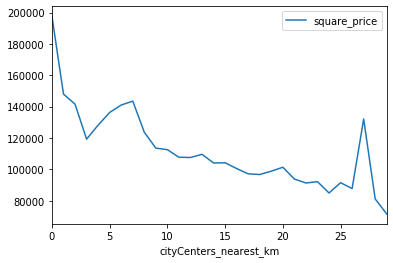

In [83]:
pivot_table_km = spb_apartment.pivot_table(index = 'cityCenters_nearest_km', values = 'square_price', aggfunc = 'mean')
pivot_table_km.plot()
plt.show()

**Вывод.**

Явное снижение цены, а не обычная волантильность, начинается с границы в 8 километров. То есть, все что ближе 8 километров - это центр Санкт-Петербурга. 

### 4.7 Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат и высота потолков. Также выделим факторы, которые влияют на стоимость квартиры: число комнат, этаж, удалённость от центра и дата размещения объявления. Выясним, отличается ли результат по центру от результата по всему городу.

Выделяем сегмент квартир в центре Санкт-Петербурга, который обозначили ранее, и сохраняем в новую переменную:

In [84]:
spb_apartment_center = spb_apartment.query('cityCenters_nearest_km <= 8')

**1.** Начнем изучение параметров с `total_area`. Построим две гистограммы, с общей картиной по городу и по центру:

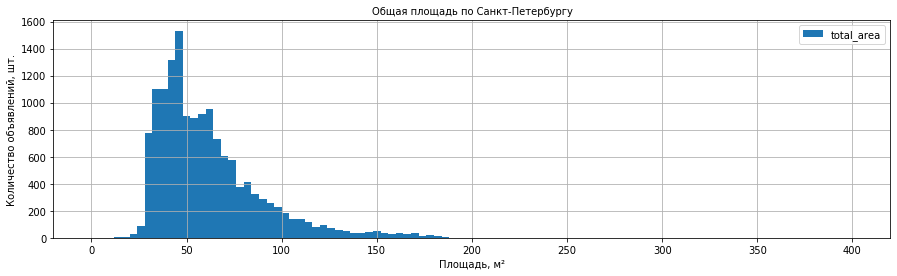

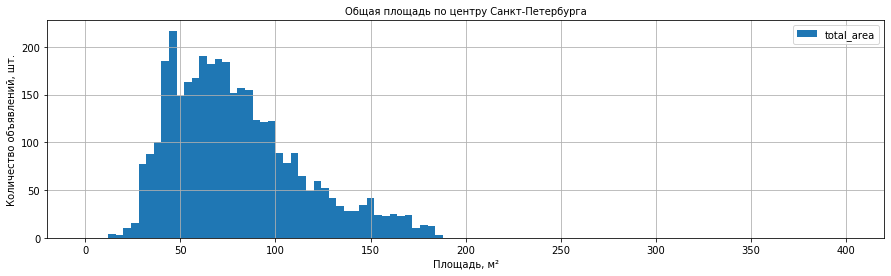

In [112]:
spb_apartment.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,400))
plt.title('Общая площадь по Санкт-Петербургу', size=10)
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений, шт.')

spb_apartment_center.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,400))
plt.title('Общая площадь по центру Санкт-Петербурга', size=10)
plt.xlabel('Площадь, м²')
plt.ylabel('Количество объявлений, шт.')

plt.show()

На графиках видно, что в центре Санкт-Петербурга сильнее выделяются квартиры с бОльшей площадью и это выглядит логичным, так как в центре квартиры дороже и больше в основном. 

**2.** Теперь по `last_price`:

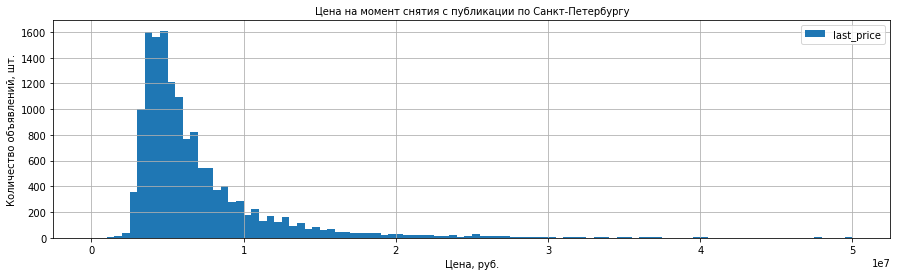

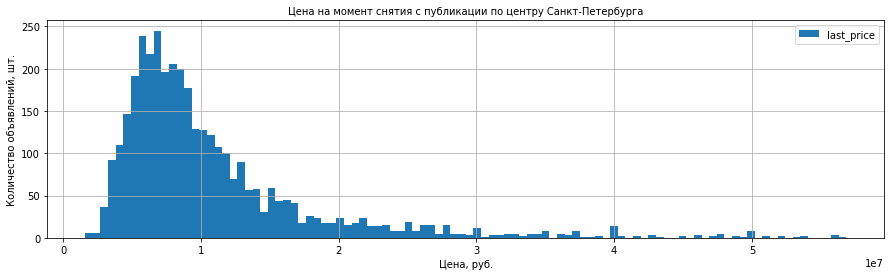

In [113]:
spb_apartment.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,50000000))
plt.title('Цена на момент снятия с публикации по Санкт-Петербургу', size=10)
plt.xlabel('Цена, руб.')
plt.ylabel('Количество объявлений, шт.')

spb_apartment_center.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (15,4))
plt.title('Цена на момент снятия с публикации по центру Санкт-Петербурга', size=10)
plt.xlabel('Цена, руб.')
plt.ylabel('Количество объявлений, шт.')

plt.show()

Здесь заметно, что цены в центре на порядок выше, так как именно объявления по центру больше выделяются на графике по наибольшей стоимости. 

**3.** Следом `rooms`:

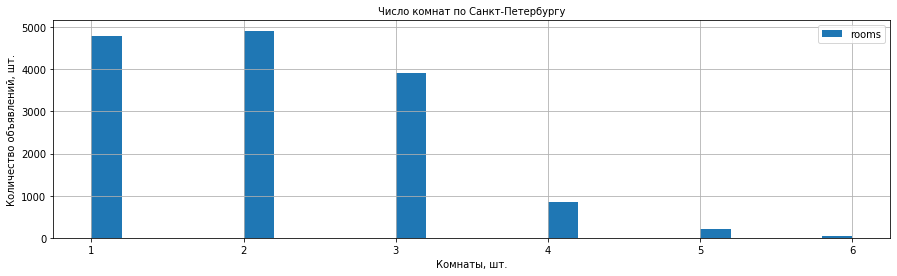

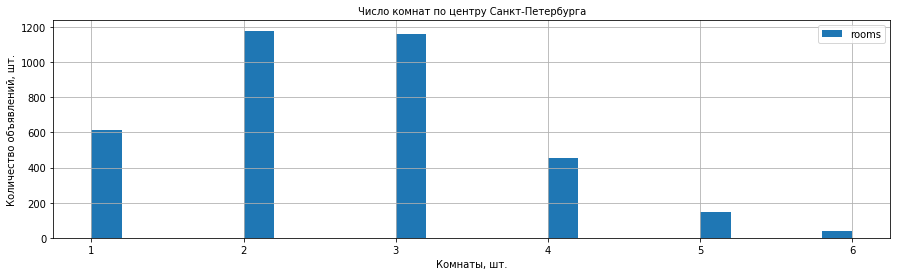

In [114]:
spb_apartment.plot(y = 'rooms', kind = 'hist', bins = 25, grid=True, figsize = (15,4))
plt.title('Число комнат по Санкт-Петербургу', size=10)
plt.xlabel('Комнаты, шт.')
plt.ylabel('Количество объявлений, шт.')

spb_apartment_center.plot(y = 'rooms', kind = 'hist', bins = 25, grid=True, figsize = (15,4))
plt.title('Число комнат по центру Санкт-Петербурга', size=10)
plt.xlabel('Комнаты, шт.')
plt.ylabel('Количество объявлений, шт.')

plt.show()

В центре Санкт-Петербурга меньше выделяются однокомнатные квартиры в сравнении с остальными, чего не скажешь в целом по городу, а также сильнее выражены 5-ти и 6-ти комнатные квартиры. 

**4.** Напоследок `ceiling_height`:

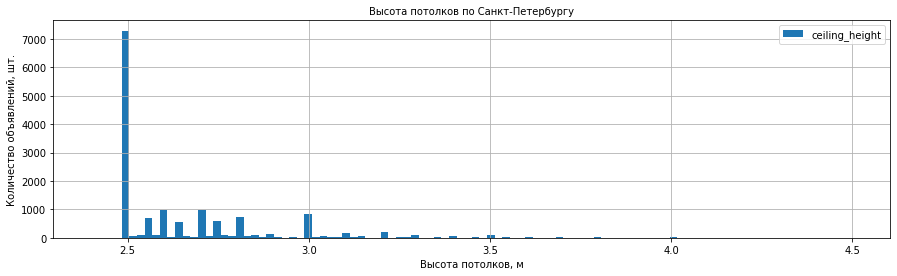

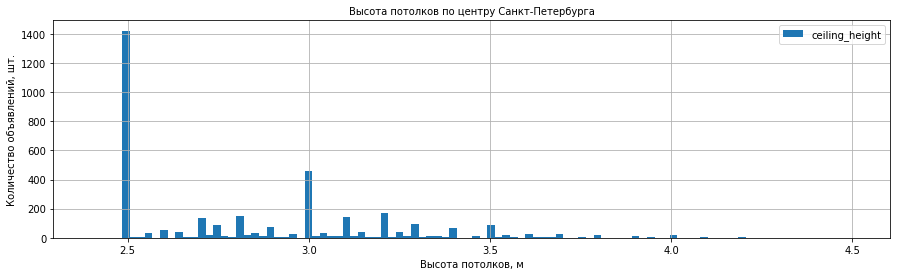

In [115]:
spb_apartment.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (15,4))
plt.title('Высота потолков по Санкт-Петербургу', size=10)
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений, шт.')

spb_apartment_center.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (15,4))
plt.title('Высота потолков по центру Санкт-Петербурга', size=10)
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений, шт.')

plt.show()

В центре более выражены квартиры с высокими потолками. 

Приступим к изучению параметров: число комнат, этаж, удалённость от центра и дата размещения объявления, чтобы узнать, влияют ли они на цену. 

**1.** Начнем с `rooms`. Построим столбчатые диаграммы:

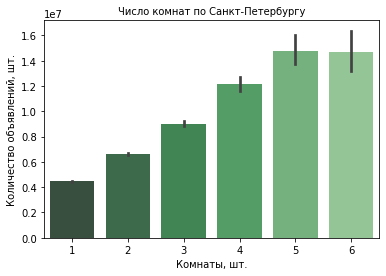

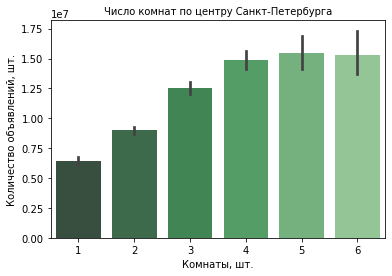

In [129]:
sb.barplot(x = "rooms", y = "last_price", data = spb_apartment, palette="Greens_d")
plt.title('Число комнат по Санкт-Петербургу', size=10)
plt.xlabel('Комнаты, шт.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

sb.barplot(x = "rooms", y = "last_price", data = spb_apartment_center, palette="Greens_d")
plt.title('Число комнат по центру Санкт-Петербурга', size=10)
plt.xlabel('Комнаты, шт.')
plt.ylabel('Количество объявлений, шт.')
plt.show()

В обоих случаях зависимость цены от числа комнат есть, явно выраженная. Единственное, по центру Санкт-Петербурга после 4-х комнат идет небольшое увеличение цен. 

**2.** Теперь по `floors` и `floor_table`:

In [133]:
floor_table_spb = spb_apartment.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'count')
floor_table_spb_center = spb_apartment_center.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'count')

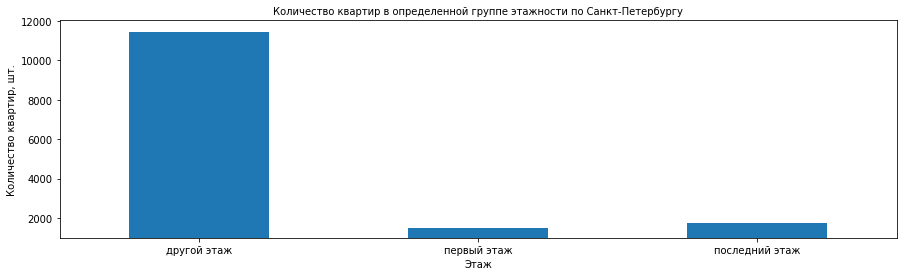

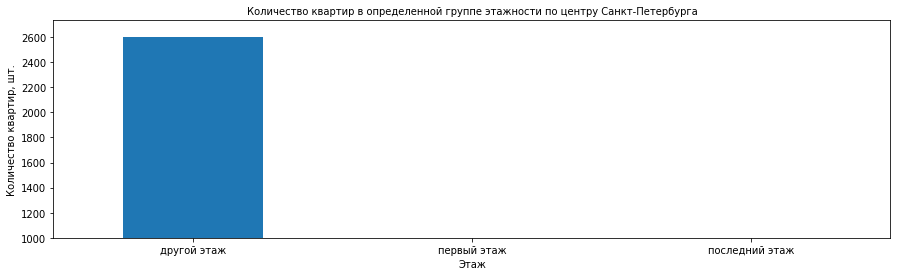

In [137]:
floor_table_spb.plot(kind = 'bar', figsize = (15, 4), rot = 360).legend_.remove()
plt.ylim(bottom = 1000)
plt.xlabel('Этаж')
plt.title('Количество квартир в определенной группе этажности по Санкт-Петербургу', size = 10)
plt.ylabel('Количество квартир, шт.')
plt.show()

floor_table_spb_center.plot(kind = 'bar', figsize = (15, 4), rot = 360).legend_.remove()
plt.ylim(bottom = 1000)
plt.xlabel('Этаж')
plt.title('Количество квартир в определенной группе этажности по центру Санкт-Петербурга', size = 10)
plt.ylabel('Количество квартир, шт.')
plt.show()

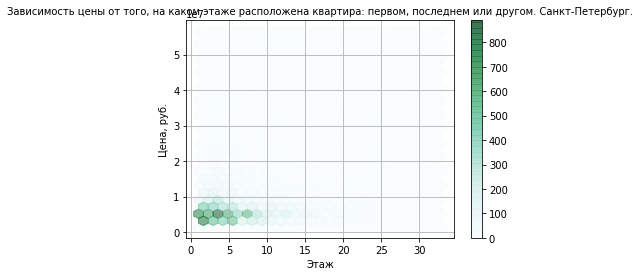

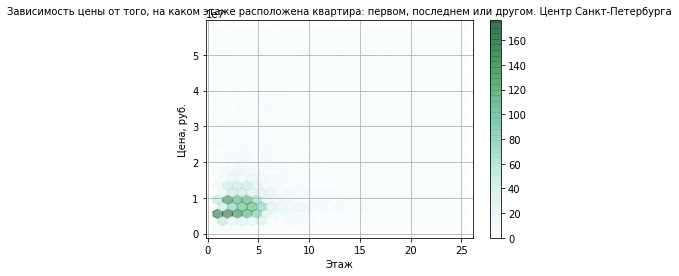

In [140]:
spb_apartment.plot(x = 'floor', y = 'last_price', kind = 'hexbin', alpha = 0.5, sharex=False, grid=True, gridsize = 25)
plt.title('Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Санкт-Петербург.',
          size = 10)
plt.xlabel('Этаж')
plt.ylabel('Цена, руб.')
plt.show()

spb_apartment_center.plot(x = 'floor', y = 'last_price', kind = 'hexbin', alpha = 0.5, sharex=False, grid=True, gridsize = 25)
plt.title('Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Центр Санкт-Петербурга',
          size = 10)
plt.xlabel('Этаж')
plt.ylabel('Цена, руб.')
plt.show()

В центре Санкт-Петербурга меньше объявлений на первом и последнем этажах, если сравнивать в целом по городу. Также не прослеживается какая-то зависимость цены от этажности. 

**3.** Теперь по `cityCenters_nearest`:

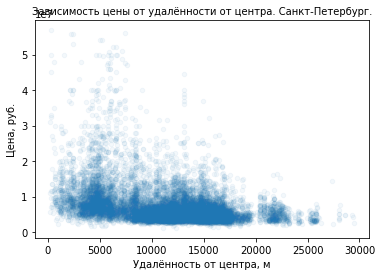

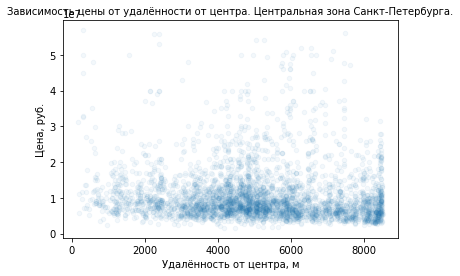

In [141]:
spb_apartment.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', alpha = 0.05)
plt.title('Зависимость цены от удалённости от центра. Санкт-Петербург.', size = 10)
plt.xlabel('Удалённость от центра, м')
plt.ylabel('Цена, руб.')
plt.show()

spb_apartment_center.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', alpha = 0.05)
plt.title('Зависимость цены от удалённости от центра. Центральная зона Санкт-Петербурга.', size = 10)
plt.xlabel('Удалённость от центра, м')
plt.ylabel('Цена, руб.')
plt.show()

In [145]:
print('Коэффициент корреляции по Санкт-Петербургу =',
      spb_apartment['last_price'].corr(spb_apartment['cityCenters_nearest']).round(2))
print('Коэффициент корреляции по центру Санкт-Петербурга =',
      spb_apartment_center['last_price'].corr(spb_apartment_center['cityCenters_nearest']).round(2))

Коэффициент корреляции по Санкт-Петербургу = -0.39
Коэффициент корреляции по центру Санкт-Петербурга = -0.08


В первом случае видим слабо-отрицательную зависимость цены квартиры от удалённости от центра, когда при удалении от центра происходит снижение цены, как и по всему датасету, а вот при проведении такого анализа уже по центру Санкт-Петербурга видно, как ситуация резко изменилась. Зависимости нет, так как по сути все квартиры из этой таблицы находятся в центральной части города. 

**4.** В заключение по изучим зависимость цены от даты размещения объявления: дня недели, месяца и года:

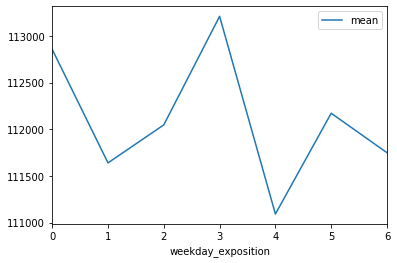

In [148]:
pivot_table_weekday_exposition_spb_apartment = spb_apartment.pivot_table(index = 'weekday_exposition',
                                                           values = 'square_price', aggfunc = ['mean', 'count'])
pivot_table_weekday_exposition_spb_apartment.columns = ['mean', 'count']
pivot_table_weekday_exposition_spb_apartment.sort_values('mean', ascending = False)
pivot_table_weekday_exposition_spb_apartment.plot(y = 'mean')
plt.show()

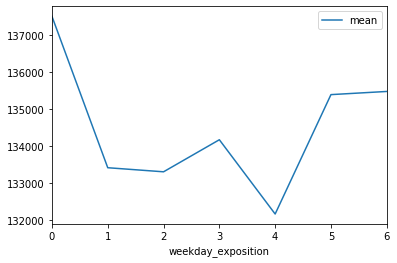

In [149]:
pivot_table_weekday_exposition_spb_apartment_center = spb_apartment_center.pivot_table(index = 'weekday_exposition',
                                                           values = 'square_price', aggfunc = ['mean', 'count'])
pivot_table_weekday_exposition_spb_apartment_center.columns = ['mean', 'count']
pivot_table_weekday_exposition_spb_apartment_center.sort_values('mean', ascending = False)
pivot_table_weekday_exposition_spb_apartment_center.plot(y = 'mean')
plt.show()

Информация по городу и центру почти одинаковая, то есть в одни и те же дни примерно такая же активность по дню размещения. 

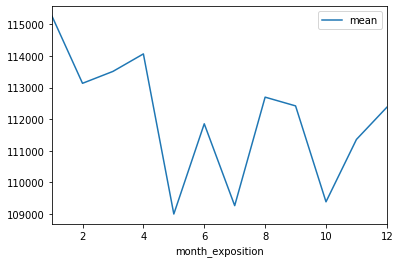

In [150]:
pivot_table_month_exposition_spb_apartment = spb_apartment.pivot_table(index = 'month_exposition',
                                                           values = 'square_price', aggfunc = ['mean', 'count'])
pivot_table_month_exposition_spb_apartment.columns = ['mean', 'count']
pivot_table_month_exposition_spb_apartment.sort_values('mean', ascending = False)
pivot_table_month_exposition_spb_apartment.plot(y = 'mean')
plt.show()

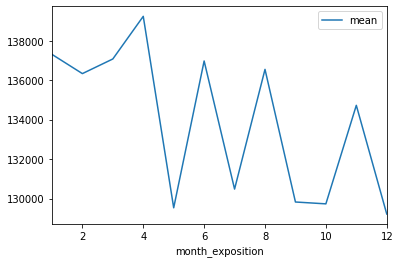

In [151]:
pivot_table_month_exposition_spb_apartment_center = spb_apartment_center.pivot_table(index = 'month_exposition',
                                                           values = 'square_price', aggfunc = ['mean', 'count'])
pivot_table_month_exposition_spb_apartment_center.columns = ['mean', 'count']
pivot_table_month_exposition_spb_apartment_center.sort_values('mean', ascending = False)
pivot_table_month_exposition_spb_apartment_center.plot(y = 'mean')
plt.show()

Аналогично и здесь, каких-то существенных изменений нет, если говорить о самой волантильности. Скачки почти одинаковые. 

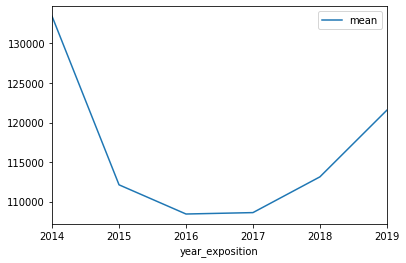

In [152]:
pivot_table_year_exposition_spb_apartment = spb_apartment.pivot_table(index = 'year_exposition',
                                                           values = 'square_price', aggfunc = ['mean', 'count'])
pivot_table_year_exposition_spb_apartment.columns = ['mean', 'count']
pivot_table_year_exposition_spb_apartment.sort_values('mean', ascending = False)
pivot_table_year_exposition_spb_apartment.plot(y = 'mean')
plt.show()

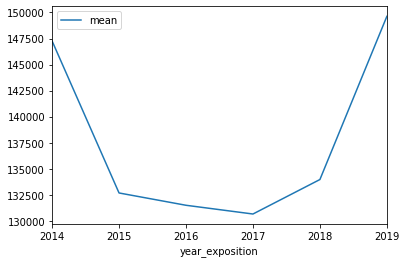

In [153]:
pivot_table_year_exposition_spb_apartment_center = spb_apartment_center.pivot_table(index = 'year_exposition',
                                                           values = 'square_price', aggfunc = ['mean', 'count'])
pivot_table_year_exposition_spb_apartment_center.columns = ['mean', 'count']
pivot_table_year_exposition_spb_apartment_center.sort_values('mean', ascending = False)
pivot_table_year_exposition_spb_apartment_center.plot(y = 'mean')
plt.show()

Здесь такая же ситуация. Различий по сути нет, резкий спад в 2015-2016 годах, в котором мы ранее предположительно «обвинили» валютный кризис в России. 

**Вывод.**



**Общий вывод:**

Мы выделили сегмент квартир в центре, затем начали работать с этим сегментом и данными в целом по Санкт-Петербургу. Изучили площадь, цену, число комнат и высоту потолков, сравнили результаты по городу и центру. Также изучили влияние числа комнат, этажа, удалённости от центра и даты размещения на стоимость квартиры по городу и центру, сравнили результаты. Были определенные различия, но не везде, которые мы прокомментировали после каждого изучения. 



## Общий вывод

**Вывод.**

Мы провели объемную работу с полученным файлом и ознакомились с данными в нем. Затем двигались по следующему пути:
- обработали пропущенные значения, заменили типы данных на нужные для работы, а также обработали дубликаты;
- посчитали и добавили в таблицу цену квадратного метра, соотношение жилой и кухонной площади к общей, выделили в отдельные столбцы из даты дни недели, месяцы и года размещения объявлений, а также добавили категории по этажам квартир;
- провели исследовательский анализ данных, изучив ряд параметров в общем, в том числе на наличие выбивающихся и редких значений, затем удаляли их. Выявили факторы, влияющие на стоимость квартиры, а также определили границу центра Санкт-Петербурга.

Можем подытожить, что цены на квартиры в целом по имеющимся данным зависят в первую очередь от общей площади квартиры, а также, как следствие, от жилой площади и площади кухни. Остальные параметры в меньшей степени влияют на ценообразование. Но из оставшихся за бортом показетелей можно еще выделить количество комнат. 